<a href="https://colab.research.google.com/github/NichaRoj/cubems-data-pipeline/blob/master/colab/example_ltsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre Step

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
np.random.seed(7)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.python.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Load Concated Dataframe

In [0]:
path = "/content/drive/My Drive/Senior Project- Data Pipeline & Data Analytic/Cham5 Data/Bld_Load_Sum_All_Weather.csv"
df = pd.read_csv(path)

In [0]:
df.head()

,Date,AC_Load(kW),Light_Load(kW),Plug_Load(kW),Total_Load(kW),temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2)
0,2018-07-01 00:00:00,169.256742,191.652042,97.396087,458.304871,77.483333,76.258333,95.916667,0.333333,0.0
1,2018-07-01 01:00:00,170.633793,192.295070,98.402265,461.331127,78.166667,76.933333,95.916667,0.250000,0.0
2,2018-07-01 02:00:00,170.600131,191.796102,97.898014,460.294247,78.308333,76.683333,94.916667,0.833333,0.0
3,2018-07-01 03:00:00,170.043723,190.105935,95.195810,455.345468,78.766667,76.491667,92.833333,0.833333,0.0
4,2018-07-01 04:00:00,169.864992,216.117156,90.437788,476.419937,79.366667,76.166667,90.000000,0.250000,0.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11014 entries, 0 to 11013
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            11014 non-null  object 
 1   AC_Load(kW)     11014 non-null  float64
 2   Light_Load(kW)  11014 non-null  float64
 3   Plug_Load(kW)   11014 non-null  float64
 4   Total_Load(kW)  11014 non-null  float64
 5   temp(degF)      11014 non-null  float64
 6   dew(degF)       11014 non-null  float64
 7   humidity(%)     11014 non-null  float64
 8   windspeed(mph)  11014 non-null  float64
 9   solar(w/m2)     11014 non-null  float64
dtypes: float64(9), object(1)
memory usage: 860.6+ KB


In [0]:
#Change to datetime dtype
df['Date']=pd.to_datetime(df['Date'])

#set index to DateTime
df.set_index('Date', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11014 entries, 2018-07-01 00:00:00 to 2019-12-14 06:00:00
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AC_Load(kW)     11014 non-null  float64
 1   Light_Load(kW)  11014 non-null  float64
 2   Plug_Load(kW)   11014 non-null  float64
 3   Total_Load(kW)  11014 non-null  float64
 4   temp(degF)      11014 non-null  float64
 5   dew(degF)       11014 non-null  float64
 6   humidity(%)     11014 non-null  float64
 7   windspeed(mph)  11014 non-null  float64
 8   solar(w/m2)     11014 non-null  float64
dtypes: float64(9)
memory usage: 860.5 KB


In [0]:
df.describe()

,AC_Load(kW),Light_Load(kW),Plug_Load(kW),Total_Load(kW),temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2)
count,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000
mean,224.522219,171.197881,57.508088,453.228187,84.836450,74.641111,72.705039,1.862352,171.678454
std,146.309364,75.832475,14.906246,170.306587,4.489054,4.460360,12.030189,1.995187,238.766552
min,9.373596,33.854209,29.878878,96.159106,66.833333,47.633333,24.916667,0.000000,0.000000
25%,135.309076,126.041613,47.475971,327.998691,81.808333,73.675000,64.416667,0.083333,0.000000
50%,165.336853,155.688012,54.148788,416.553410,84.441667,75.858333,73.750000,1.250000,9.633333
75%,288.684598,202.411963,64.051024,562.693019,88.033333,77.383333,82.000000,3.000000,326.041667
max,924.720030,572.041501,122.487818,1214.945954,100.800000,82.616667,97.416667,11.250000,972.500000


**Plot Graph Light Load**

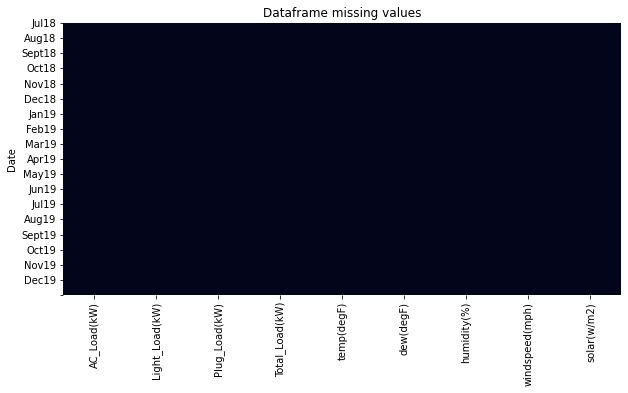

In [0]:
#The pink color indicates missing values
num_ticks=19 #tick number for Y-axis
plt.figure(figsize = (10,5))
ax = sns.heatmap(df.isnull(),cbar=False,
                 yticklabels=['Jul18','Aug18','Sept18','Oct18','Nov18','Dec18','Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sept19','Oct19','Nov19','Dec19',''])
ax.set_yticks(np.linspace(0,len(df),num_ticks,dtype=np.int))
ax.set_title('Dataframe missing values')
plt.show()

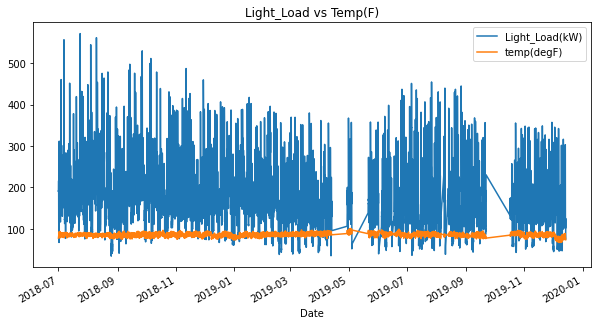

In [0]:
plt.figure(figsize=(10,5))
df['Light_Load(kW)'].plot()
df['temp(degF)'].plot()
plt.title('Light_Load vs Temp(F)')
plt.legend(['Light_Load(kW)', 'temp(degF)'], loc='upper right')

#Prepare Dataframe for Light Load

In [0]:
df['LLd-1'] = df['Light_Load(kW)'].shift(1)
df['W']= df.index.dayofweek
df['H']= df.index.hour
df.head()

,AC_Load(kW),Light_Load(kW),Plug_Load(kW),Total_Load(kW),temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2),LLd-1,W,H
Date,,,,,,,,,,,,
2018-07-01 00:00:00,169.256742,191.652042,97.396087,458.304871,77.483333,76.258333,95.916667,0.333333,0.0,NaN,6,0
2018-07-01 01:00:00,170.633793,192.295070,98.402265,461.331127,78.166667,76.933333,95.916667,0.250000,0.0,191.652042,6,1
2018-07-01 02:00:00,170.600131,191.796102,97.898014,460.294247,78.308333,76.683333,94.916667,0.833333,0.0,192.295070,6,2
2018-07-01 03:00:00,170.043723,190.105935,95.195810,455.345468,78.766667,76.491667,92.833333,0.833333,0.0,191.796102,6,3
2018-07-01 04:00:00,169.864992,216.117156,90.437788,476.419937,79.366667,76.166667,90.000000,0.250000,0.0,190.105935,6,4




**Normalize Data**

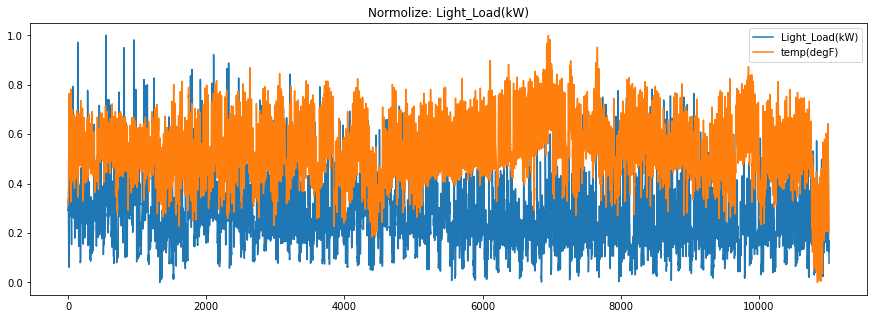

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
data_ll=scaler.fit_transform(df)

plt.figure(figsize=(15,5))
plt.title('Normolize: Light_Load(kW)')
plt.plot(data_ll[:,1]) #Light_Load(kW)
plt.plot(data_ll[:,4]) #temp(degF)	
plt.legend(['Light_Load(kW)', 'temp(degF)'], loc='upper right')

**Split Train & Test: Light_Load(kW)**

In [0]:
n = int(len(data_ll)*0.8)
trainY_ll = data_ll[1:n,1]  #(starting from row1 to remove nan value) 
trainX_ll = data_ll[1:n,4:] 
testY_ll = data_ll[n:len(data_ll),1] #Light_Load(kW)
testX_ll = data_ll[n:len(data_ll),4:] #starting from temp(F) col

print(trainY_ll.shape)
print(trainX_ll.shape)
print('== temp(degF) === dew(degF) === humidity(%) === windspeed(mph) === solar(W/m2 )=== ACLd-1  === W === H === Light_Load(kW) ======')
for i in range(5):
  print(trainX_ll[i], trainY_ll[i])

print(testY_ll.shape)
print(testX_ll.shape)
print('== temp(degF) === dew(degF) === humidity(%) === windspeed(mph) === solar(W/m2 )=== ACLd-1  === W === H === Light_Load(kW) ======')
for i in range(5):
  print(testX_ll[i,:], testY_ll[i])

(8810,)
(8810, 8)
== temp(degF) === dew(degF) === humidity(%) === windspeed(mph) === solar(W/m2 )=== ACLd-1  === W === H === Light_Load(kW) ======
[0.33366045 0.83754169 0.97931034 0.02222222 0.         0.29320245
 1.         0.04347826] 0.29439725331723265
[0.33783121 0.83039543 0.96551724 0.07407407 0.         0.29439725
 1.         0.08695652] 0.2934701268829347
[0.35132483 0.82491663 0.93678161 0.07407407 0.         0.29347013
 1.         0.13043478] 0.29032964622298557
[0.36898921 0.81562649 0.89770115 0.02222222 0.         0.29032965
 1.         0.17391304] 0.33866081535508114
[0.37782139 0.824202   0.89770115 0.01481481 0.         0.33866082
 1.         0.2173913 ] 0.3387824005344354
(2203,)
(2203, 8)
== temp(degF) === dew(degF) === humidity(%) === windspeed(mph) === solar(W/m2 )=== ACLd-1  === W === H === Light_Load(kW) ======
[0.76422964 0.87541687 0.52298851 0.05185185 0.67883462 0.13909895
 0.66666667 0.56521739] 0.16522176125942797
[0.74730128 0.88899476 0.55287356 0.014814

**Reshape data before input into LTSM**

In [0]:
# reshape input to be [samples, time steps, features]
trainX_ll = trainX_ll.reshape((trainX_ll.shape[0], 1, 8))
testX_ll = testX_ll.reshape((testX_ll.shape[0], 1, 8))
print('trainX_ll.shape=', trainX_ll.shape)
print('testX_ll.shape=', testX_ll.shape)

trainX_ll.shape= (8810, 1, 8)
testX_ll.shape= (2203, 1, 8)


In [0]:
from tensorflow.keras.optimizers import Adam

#Create LSTM: Light Load lr=0.005

In [0]:
opt = Adam(lr=0.005)

model = Sequential()
model.add(LSTM(6, activation='sigmoid',return_sequences=True, input_shape=(1, 8)))
model.add(LSTM(6, activation='sigmoid', input_shape=(1, 8)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(trainX_ll, trainY_ll, validation_split=0.1, epochs=100, batch_size=24, verbose=1)

Epoch 1/100
143/331 [===========>..................] - ETA: 0s - loss: 0.0257

KeyboardInterrupt: ignored

In [0]:
print(model.summary())

#Presict & Calculate RMSE lr=0.005

In [0]:
#predict #Light_Load(kW)
testPredict_ll = model.predict(testX_ll)

In [0]:
#denormalize the test set
testY_ll = testY_ll*(df['Light_Load(kW)'].max()-df['Light_Load(kW)'].min())+df['Light_Load(kW)'].min()  

#denormalize the prediction
testPredict_ll = testPredict_ll*(df['Light_Load(kW)'].max()-df['Light_Load(kW)'].min())+df['Light_Load(kW)'].min()  

In [0]:
print(testY_ll.shape)
print(testPredict_ll.shape)
testPredict_ll.ravel().shape

(2203,)
(2203, 1)


(2203,)

RMSE= 27.45523162731631
MAPE= 12.549500358527247


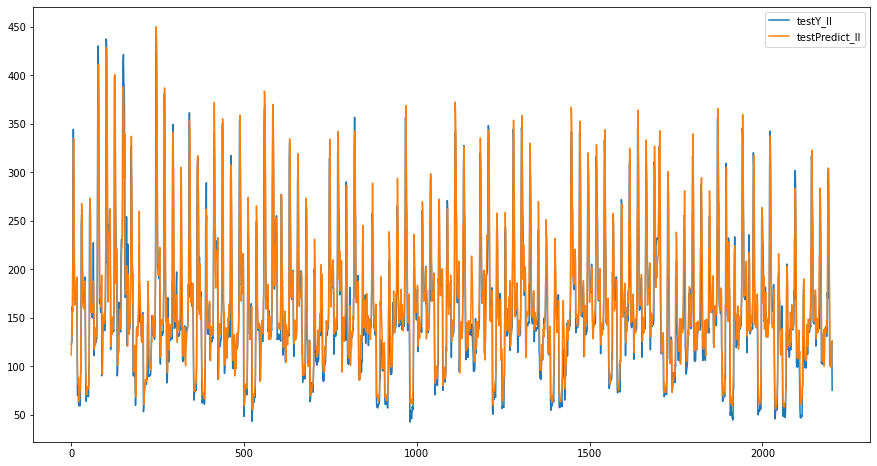

In [0]:
#plot testY vs testPredict
plt.figure(figsize=(15,8))
plt.plot(testY_ll, label='testY_ll')
plt.plot(testPredict_ll, label='testPredict_ll')
plt.legend(loc='upper right')

#calculate RMSE and MAPE
RMSE = np.sqrt(np.mean(np.square(testY_ll-testPredict_ll.ravel())))
MAPE = np.mean(np.abs((testY_ll-testPredict_ll.ravel())/testY_ll))*100

print('RMSE=',RMSE)
print('MAPE=',MAPE)

**Check model & Validation**

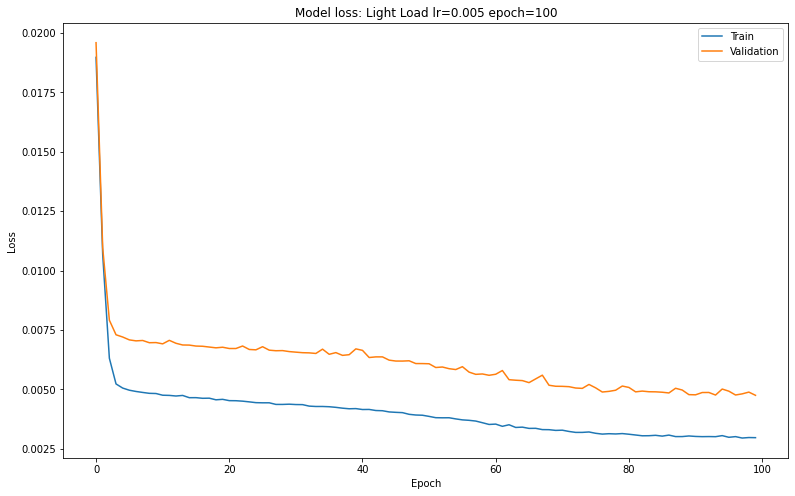

In [0]:
#Check model loss and validation loss
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: Light Load lr=0.005 epoch=100')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()